# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

### The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    1.	A single cell estimate of the population 16+ for each state.
    
    2.	Controls for Hispanic Origin by age and sex.
    
    3.	Controls by Race, age and sex.
    
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


## Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('Census_Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#Checking the dimentions of the dataset

df.shape

(32560, 15)

The dataset has 32 560 rows and 15 columns.

In [6]:
#Checking the columns of the dataset

df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
# Checking the types of columns

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The dataset has three different types of data - object (Categorical data), float64 and int64 (Numerical data).

In [8]:
# Checking the null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The dataset hans no missing values.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<Axes: >

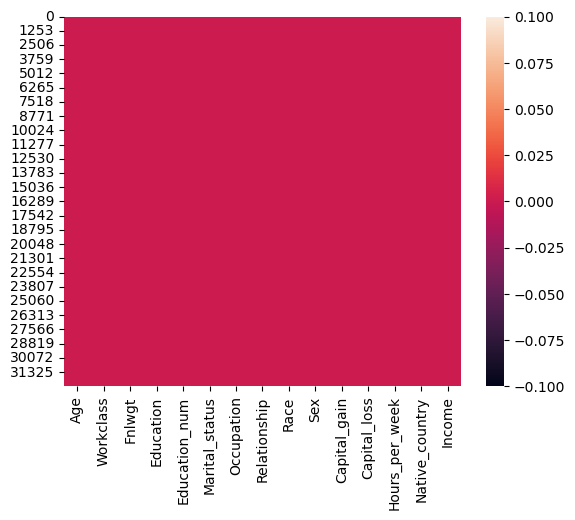

In [10]:
# Using heatmap to visualize the null values.

sns.heatmap(df.isnull())

It is clear that there is no missing values.

In [11]:
# Checking for diblicate values

df.duplicated().sum()

24

There is 24 dublicate values in the dataset.

In [12]:
#Dropping Duplocate values

df.drop_duplicates(keep='last', inplace=True)

In [13]:
#Checking again for dublicate values

df.duplicated().sum()

0

Now there is no dublicate values.

In [14]:
#Checking for unique values of each column.

for i in df.columns:
    print(df[i].unique())
    print("\n")

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


[ 83311 215646 234721 ...  34066  84661 257302]


[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-

In [15]:
#Checking the number of unique values in each column

df.nunique().to_frame("Number of unique values")

,Number of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [16]:
#Checking the value counts of each column.

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype

In [17]:
# Checking for any white spaces

df.isin([' ']).any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

No white spaces.

In [18]:
#Checking for ? simbol

df.isin([' ?']).any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income            False
dtype: bool

There is ? simbol in the dataset.

In [19]:
# Replacing these values with NAN

df = df.replace([' ?'], np.NaN)

In [20]:
#Checking for ? simbol again

df.isin([' ?']).any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [21]:
# Checking the null values again

df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

<Axes: >

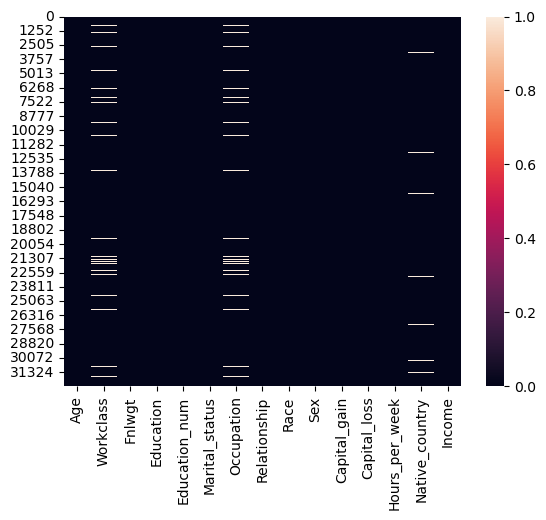

In [22]:
# Using heatmap to visualize the null values again

sns.heatmap(df.isnull())

As we can see now there are missing values as we replaced the ? data with Nan. The missing values are in Workclass, Occupation and Native_country columns.

## Separating categorical and numerical columns.

In [23]:
cat_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_columns.append(i)
print('Categorical Columns: ', cat_columns)
print('\n')


num_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_columns.append(i)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


Numerical Columns:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


We already said that the missing values are in Workclass, Occupation and Native_country columns. Those columns are columns with categorial data so we gonna use Simple Imputer to fill in the misssing values.

In [24]:
# Using Simle Imputer to fill in the missing data in the categorical columns

from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy="most_frequent")

df['Workclass']=imp.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Occupation']=imp.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Native_country']=imp.fit_transform(df['Native_country'].values.reshape(-1,1))

In [25]:
# Checking again for Null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

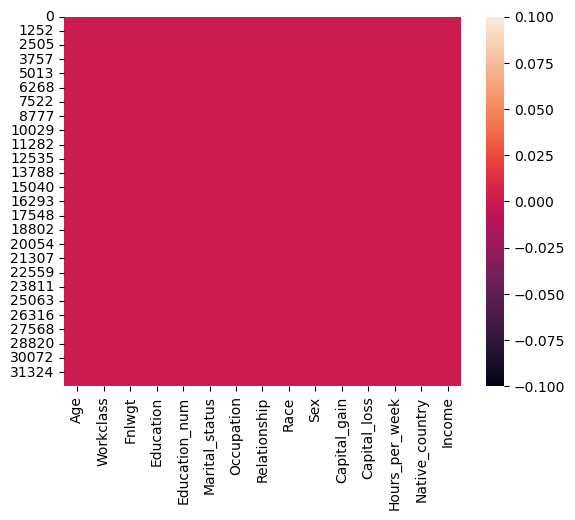

In [26]:
sns.heatmap(df.isnull())

Now we don't have missing values.

## Description of the dataset

In [27]:
# for numerical data

df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
# for object data

df.describe(include="object")

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32536,32536,32536,32536,32536,32536,32536,32536,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24509,10494,14970,5979,13187,27794,21774,29734,24697


- In 'Capital_gain' the mean is higher than the median (50%), that means the data is skewd to the right.

- In 'Capital_loss' the mean is higher than the median (50%), that means the data is skewd to the right.

- 'Workclass' has 8 unique values, the top one is Private with frequancy 24509.

- 'Education' has 16 unique values, the top one is HS-grad with frequancy 10494.

- 'Marital_status' has 7 unique values, the top one is Married-civ-spouse with frequancy 14970.

- 'Occupation' has 14 unique values, the top one is Prof-specialty with frequancy 5979.

- 'Relationship' has 6 unique values, the top one is Husband with frequancy 13187.

- 'Race' has 5 unique values, the top one is White with frequancy 27794.

- 'Sex' has 2 unique values, the top one is Male with frequancy 21774.

- 'Native_country' has 41 unique values, the top one is United-States with frequancy 29734.

- 'Income' has 2 unique values, the top one is <=50K with frequancy 24697.

# Data Visualization

## Univariate Analysis

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


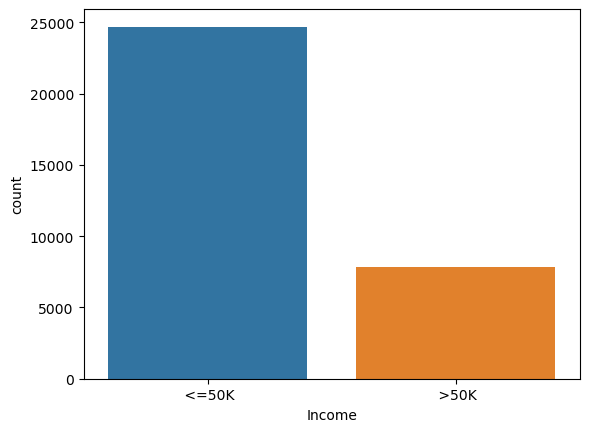

In [29]:
# Visualization of the income

sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

As we can see it is obvious that people who make over 50K are significantly less tha people who make less than 50K.

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


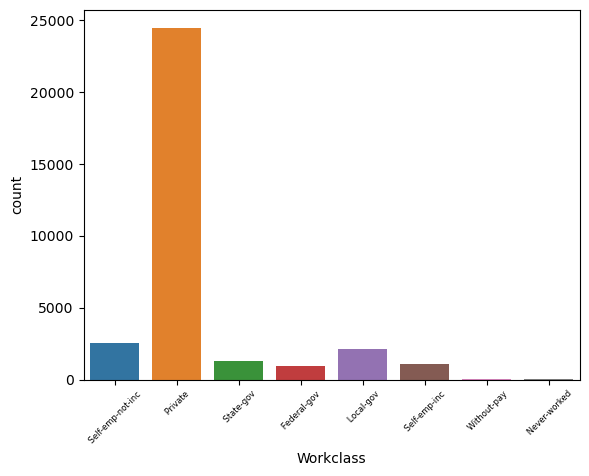

In [30]:
# Visualization of the Workclass

sns.countplot(x='Workclass',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Workclass'].value_counts())

The vast majority of the people are working class Private. We have some Self-employed, Local goverment and state goverment. People who never worked are very small number.

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


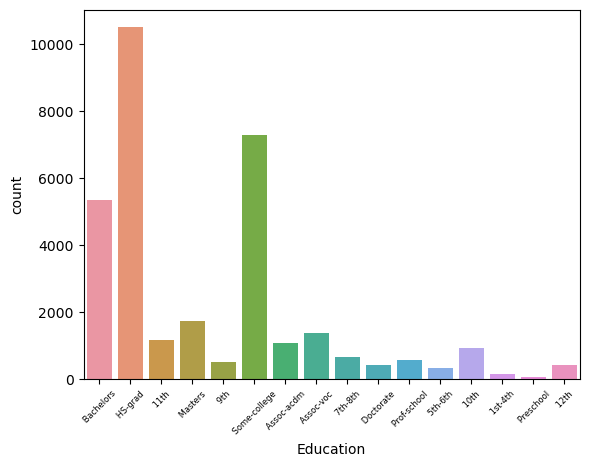

In [31]:
# Visualization of the Education

sns.countplot(x='Education',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Education'].value_counts())

The majority of the people are HS graduated, after that are people studied some form of college and people who have Bachelor degree. The least are those who have only preschool.

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


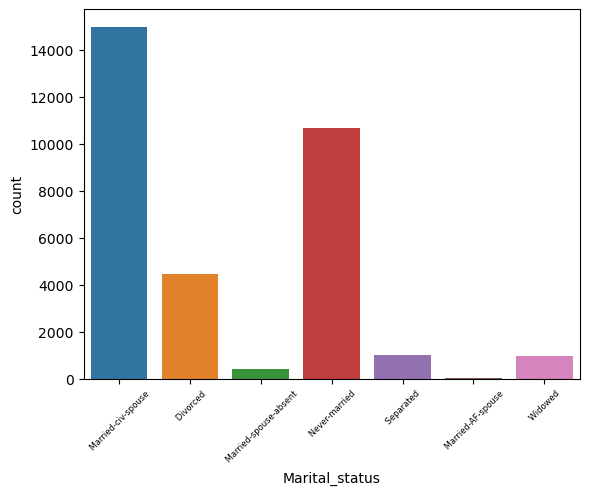

In [32]:
# Visualization of the Marital_status

sns.countplot(x='Marital_status',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Marital_status'].value_counts())

The majority of the people are Married with civil spouse, after them are Never married. Those who Married AF status are very small number.

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


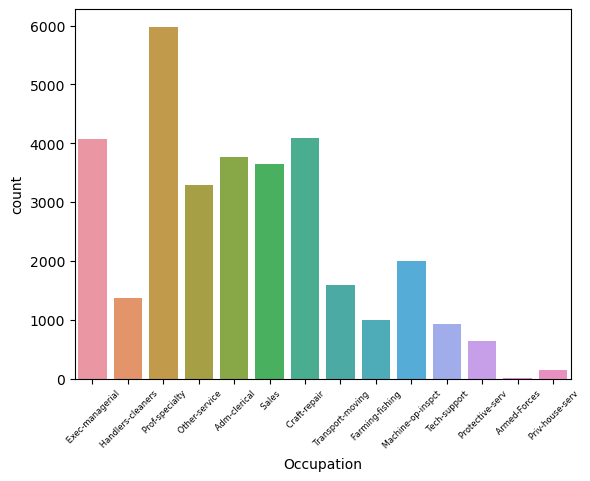

In [33]:
# Visualization of the Occupation

sns.countplot(x='Occupation',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Occupation'].value_counts())

This is visualization of people`s occupation. The majority is prof-specialty and the at least Armed Forces.

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


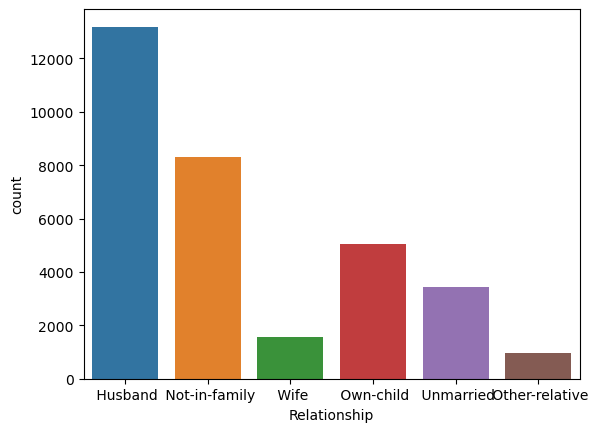

In [34]:
# Visualization of the Relationship

sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


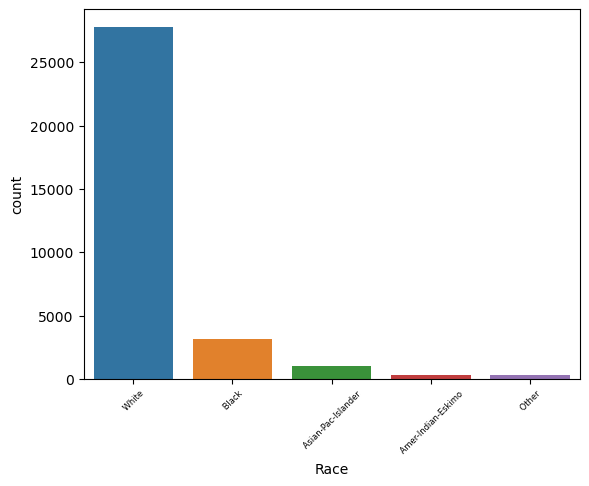

In [35]:
# Visualization of the Race

sns.countplot(x='Race',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Race'].value_counts())

The vast majority of the people are White. Black is the second and Asian-Pac-Islandic third.

 Male      21774
 Female    10762
Name: Sex, dtype: int64


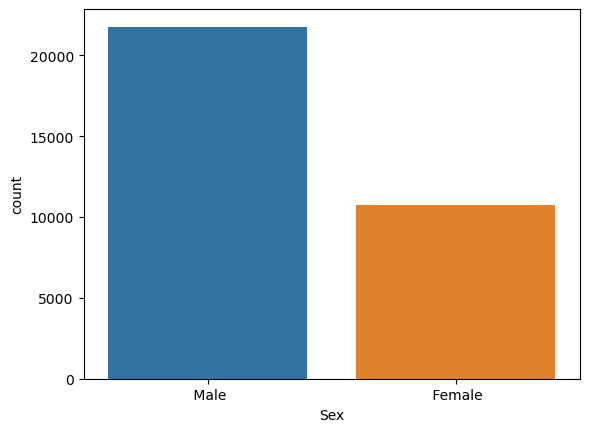

In [36]:
# Visualization of the Sex

sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

The majority of the people are male, females are about a half of the males.

 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

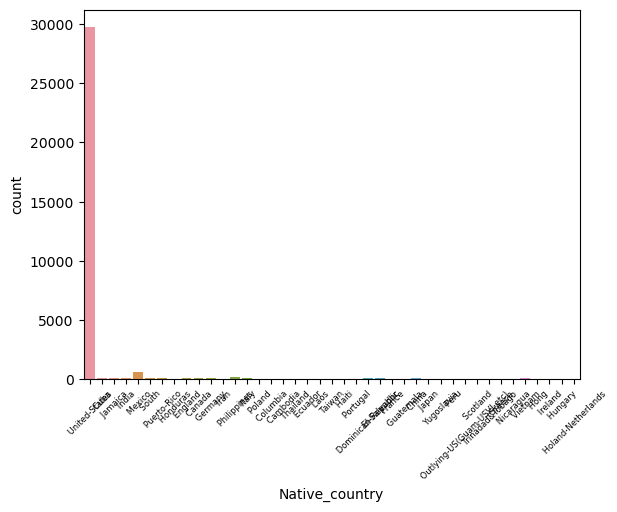

In [37]:
# Visualization of the Native_country

sns.countplot(x='Native_country',data=df)
plt.xticks(rotation=45, fontsize=6)
print(df['Native_country'].value_counts())

People are mainly from United States.

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


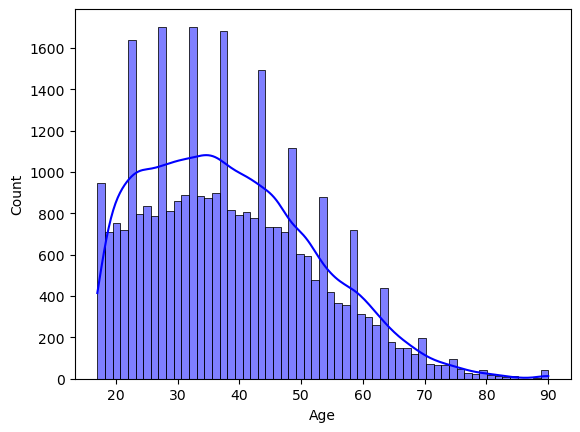

In [38]:
# Visualization the Age

sns.histplot(df['Age'],kde=True,color='b')
print(df['Age'].value_counts())

The majoryty of the people are 23-45 years old. After age of 50 the count rapidly decrese.

164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


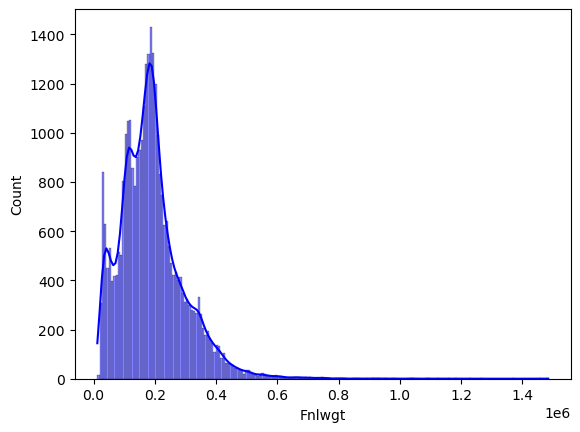

In [39]:
# Visualization the Fnlwgt (final weight)

sns.histplot(df['Fnlwgt'],kde=True,color='b')
print(df['Fnlwgt'].value_counts())

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


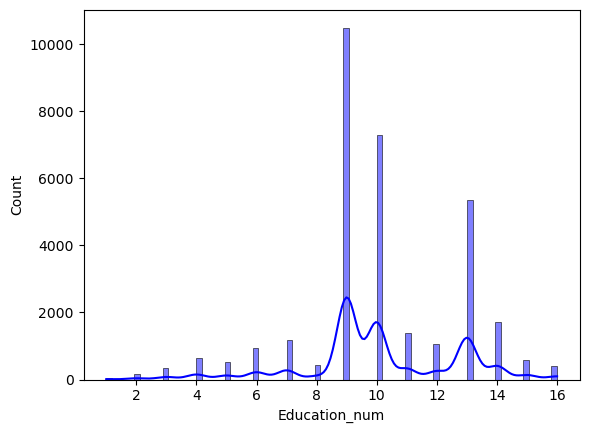

In [40]:
# Visualization the Education_num

sns.histplot(df['Education_num'],kde=True,color='b')
print(df['Education_num'].value_counts())

The "Education_num" shows the education levels numerically. 9 (HS-grad) is the most common education level, followed by 10 (Some-college) and 13 (Bachelors).

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


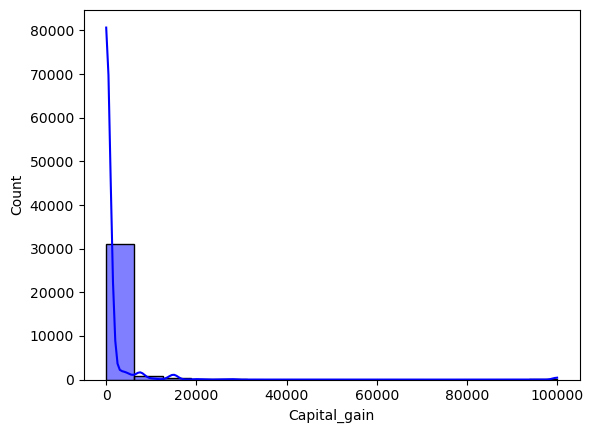

In [41]:
# Visualization the Capital_gain

sns.histplot(df['Capital_gain'],kde=True,color='b')
print(df['Capital_gain'].value_counts())

The majority of the people have capital gain 0 but there is some who have 15K or 99999.

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


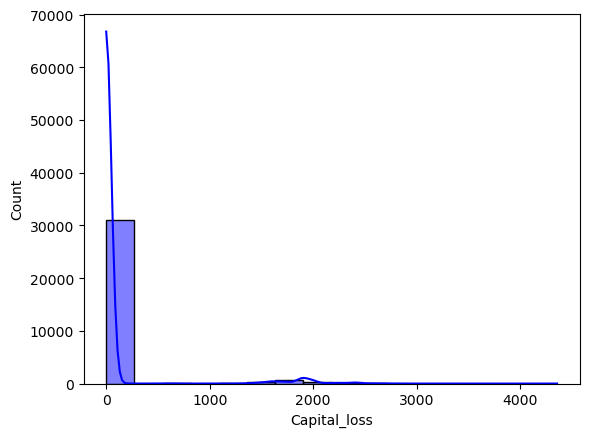

In [42]:
# Visualization the Capital_loss

sns.histplot(df['Capital_loss'],kde=True,color='b')
print(df['Capital_loss'].value_counts())

The majority of the people have Capital loss 0 but there are some who have 1902 and 1977.

40    15203
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


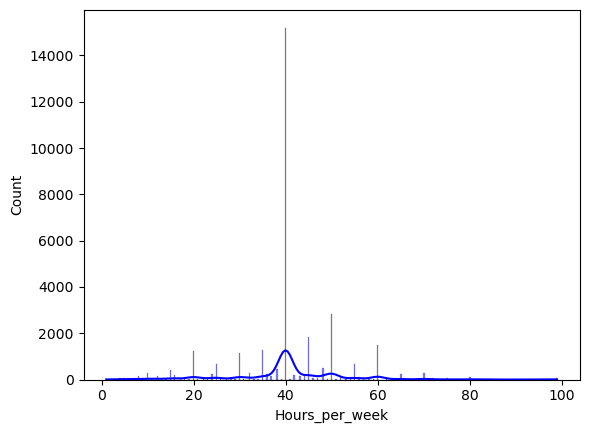

In [43]:
# Visualization the Hours_per_week

sns.histplot(df['Hours_per_week'],kde=True,color='b')
print(df['Hours_per_week'].value_counts())

The majority of the people work 40 hours per week, there are some who work 50 and some who do 45 hours per week. 40 hours is a typical working week which means that majority of the people are working full time. Those who work more than 40 indicates that they are working some overtime hours. Those who work under 40 hours we suggest they are working part time.

## Bivariate Analysis

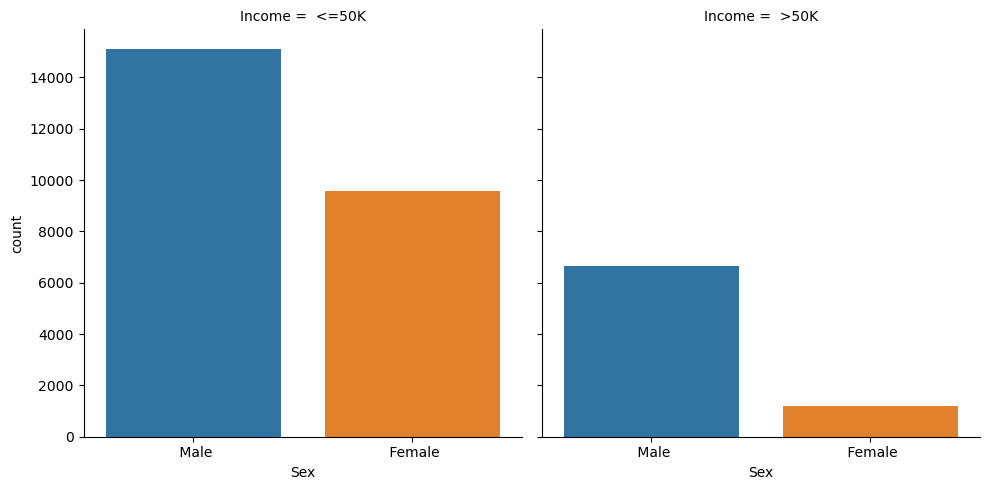

In [44]:
# Comparing Income vs sex

sns.catplot(x='Sex',col='Income',data=df,kind='count')

The majority of the people who make more than 50K are males, the females are less than a quater the count of the males. But we also can see that the majority of the people making less than 50K are males too.

<Figure size 1000x2000 with 0 Axes>

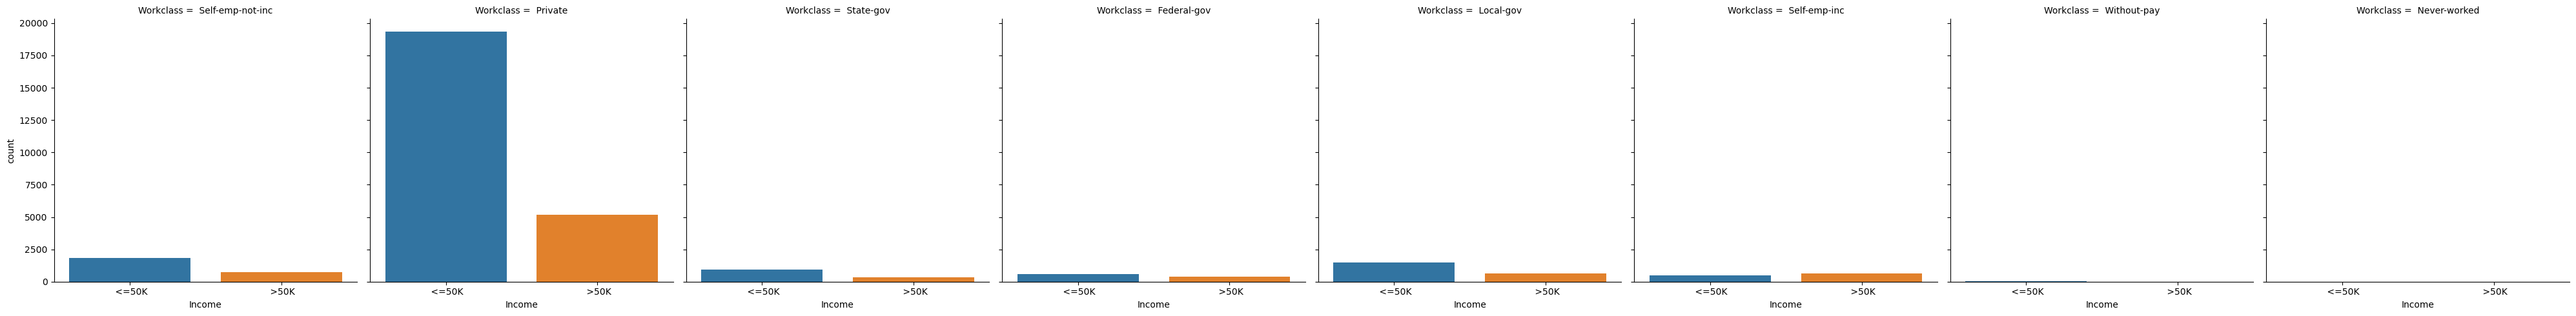

In [45]:
# Comparing Income vs Workclass

plt.figure(figsize=(10,20))
sns.catplot(x='Income', col='Workclass', data=df, kind='count')

- The majority of the self-employed-not inc people are making less than 50K.
- The majority of the people working in the private sector are making less than 50K.
- Most of the people working in State-gov sector are making less than 50K.
- Most of the people working in Federal-gov sector are making less than 50K but the difference with those who are making more than 50K is not big.
- Most of the people working in Local-gov are making less than 50K.
- Most of the people working in Self-employed-inc are making more than 50K. 

<Figure size 1000x2000 with 0 Axes>

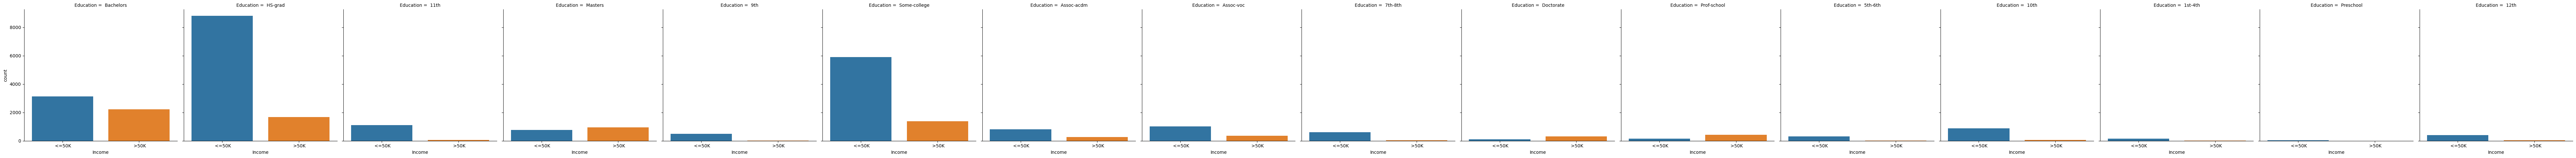

In [46]:
# Comparing Income vs Education

plt.figure(figsize=(10,20))
sns.catplot(x='Income', col='Education', data=df, kind='count')

- Most of the people with Bachelor degree are amking less than 50K but there is no big difference from those who are making more than 50K.
- The majority of the people with HS-grad are making less than 50K.
- The majority of the people with 11th are making less than 50K. We can say the same for the people who have 9th grade, some-college, Assoc-voc education, 7th-8th grade, 5th-6th grade, 10th grade, 1st-4th grade, preschool and 12th grade.
- Most of the people with Master degree are making more than 50K but the difference is not big with those who are making less.
- Most of the people who are Doctorate and Prof-school are making more than 50K.

We ca easily say that people with higher education level are most likely to make more than 50K.

<Figure size 1000x3000 with 0 Axes>

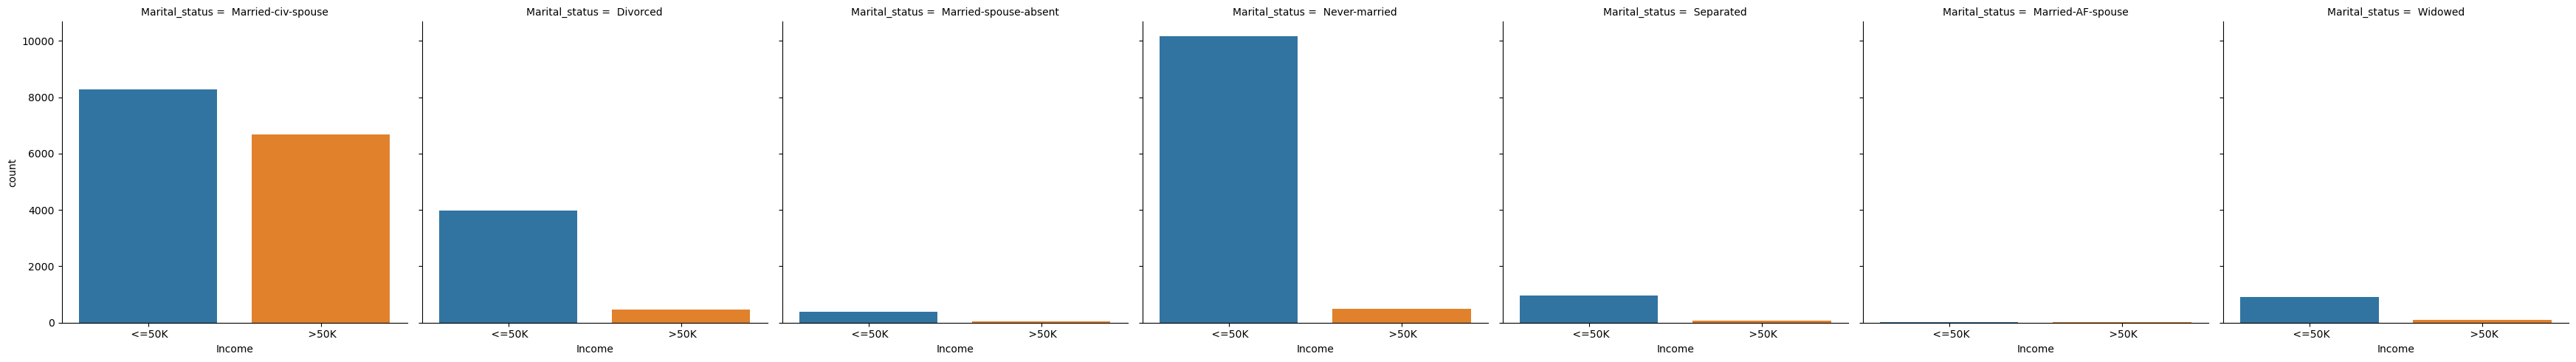

In [47]:
# Comparing Income vs Marital_status

plt.figure(figsize=(10,30))
sns.catplot(x='Income', col='Marital_status', data=df, kind='count')

From that we can see that in all kind of marital statuses people are making less than 50K but the difference between those who are making less and those who are making more is least with those people who are Married-civ-spouse.
So we can say that those who are married are more likely to make more than 50K.

<Figure size 1000x3000 with 0 Axes>

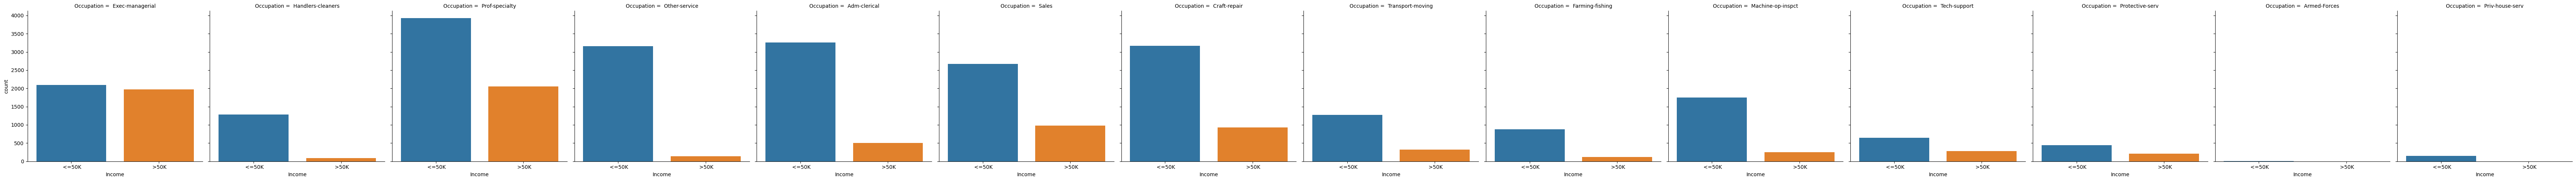

In [48]:
# Comparing Income vs Occupation

plt.figure(figsize=(10,30))
sns.catplot(x='Income', col='Occupation', data=df, kind='count')

From what we see we can say that people who are working like Exec-managerial are more likly to make more than 50K.

<Figure size 1000x3000 with 0 Axes>

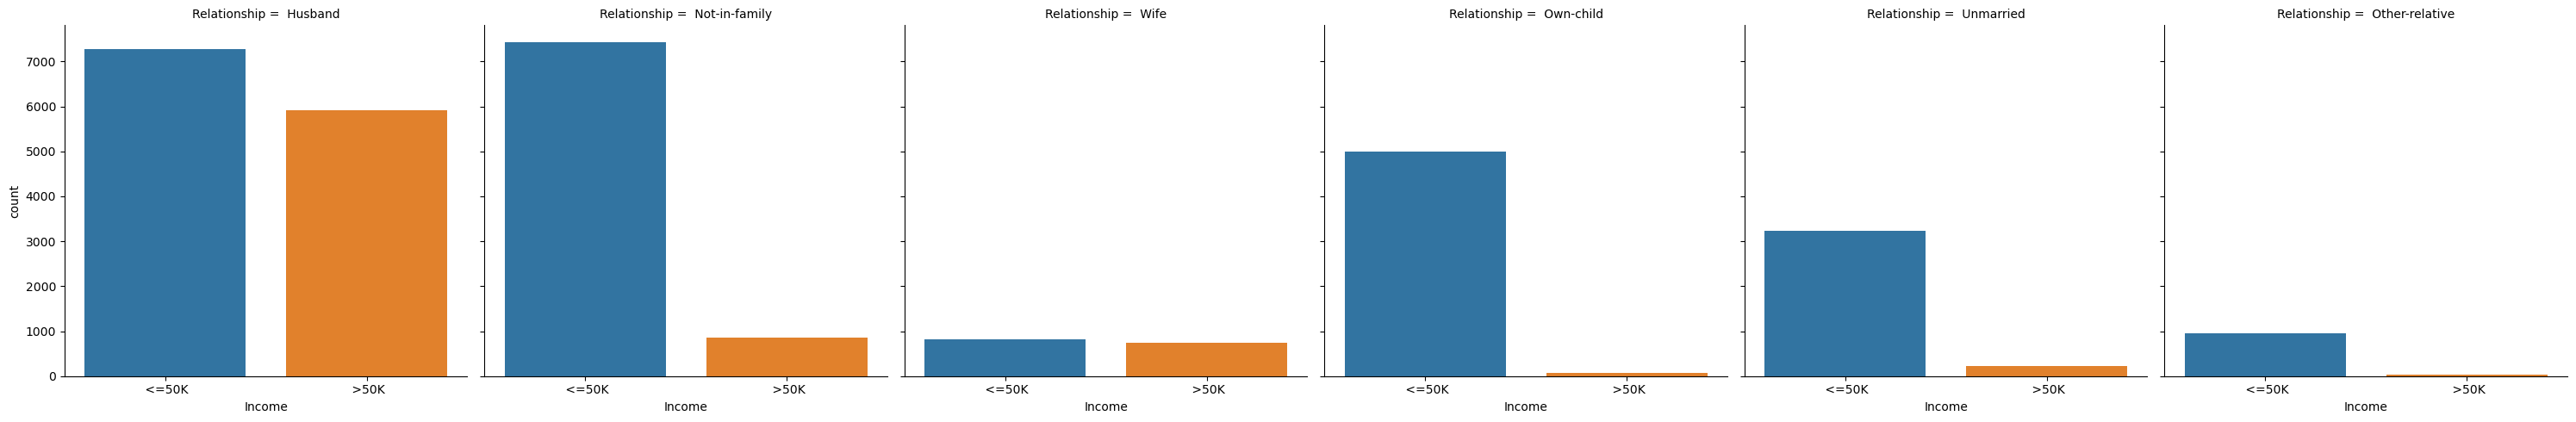

In [49]:
# Comparing Income vs Relationship

plt.figure(figsize=(10,30))
sns.catplot(x='Income', col='Relationship', data=df, kind='count')

From what we can see we can say that people in every kind of relationship stated are making less than 50K but those who are Husband or Wife are more likely to make more than 50K.

<Figure size 1000x3000 with 0 Axes>

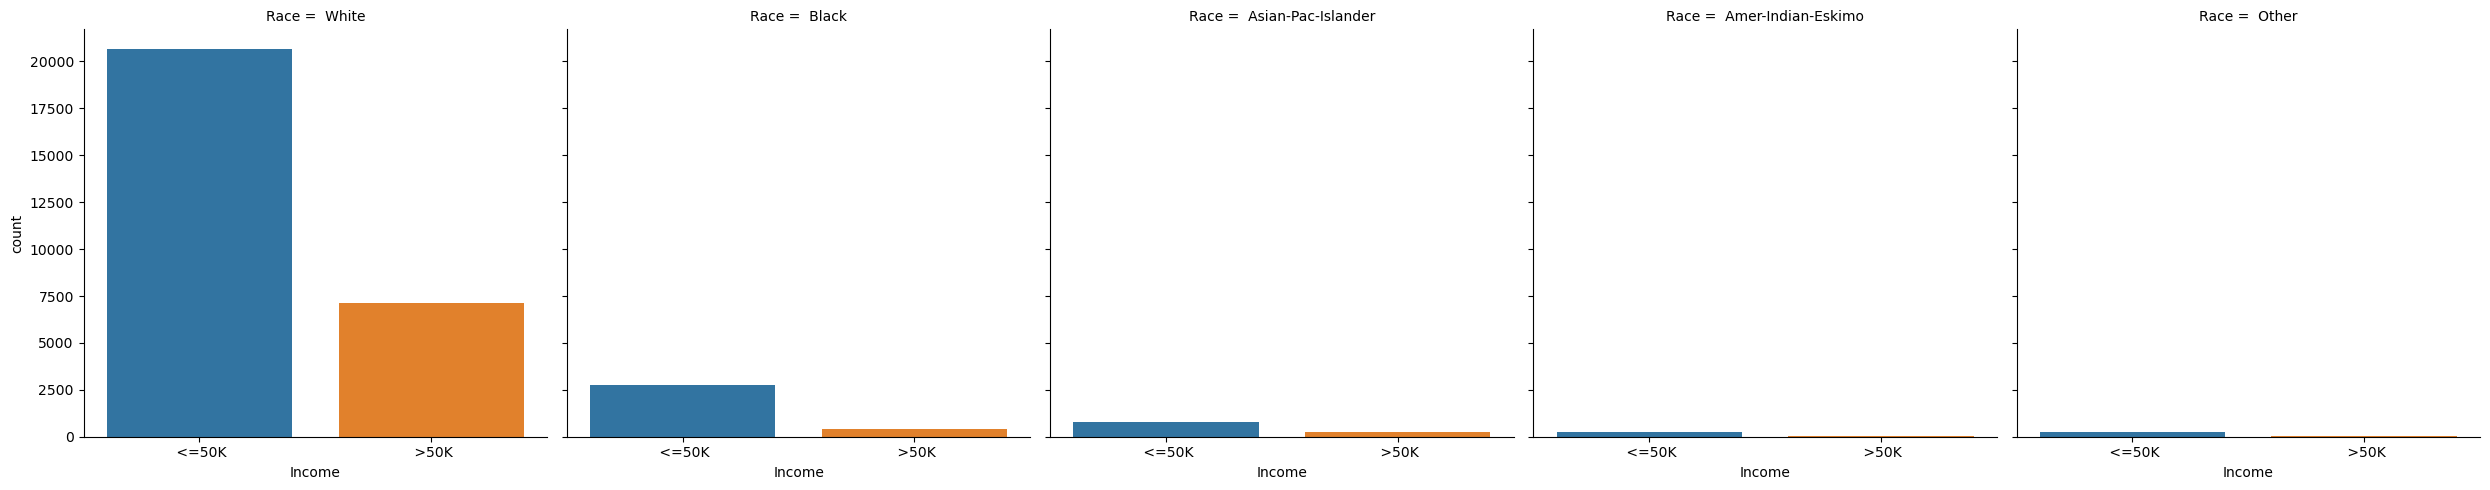

In [50]:
# Comparing Income vs Race

plt.figure(figsize=(10,30))
sns.catplot(x='Income', col='Race', data=df, kind='count')

Most of the people from every Race are making less than 50K. But the count of those who are white and making more than 50K is bigger compared with the other races

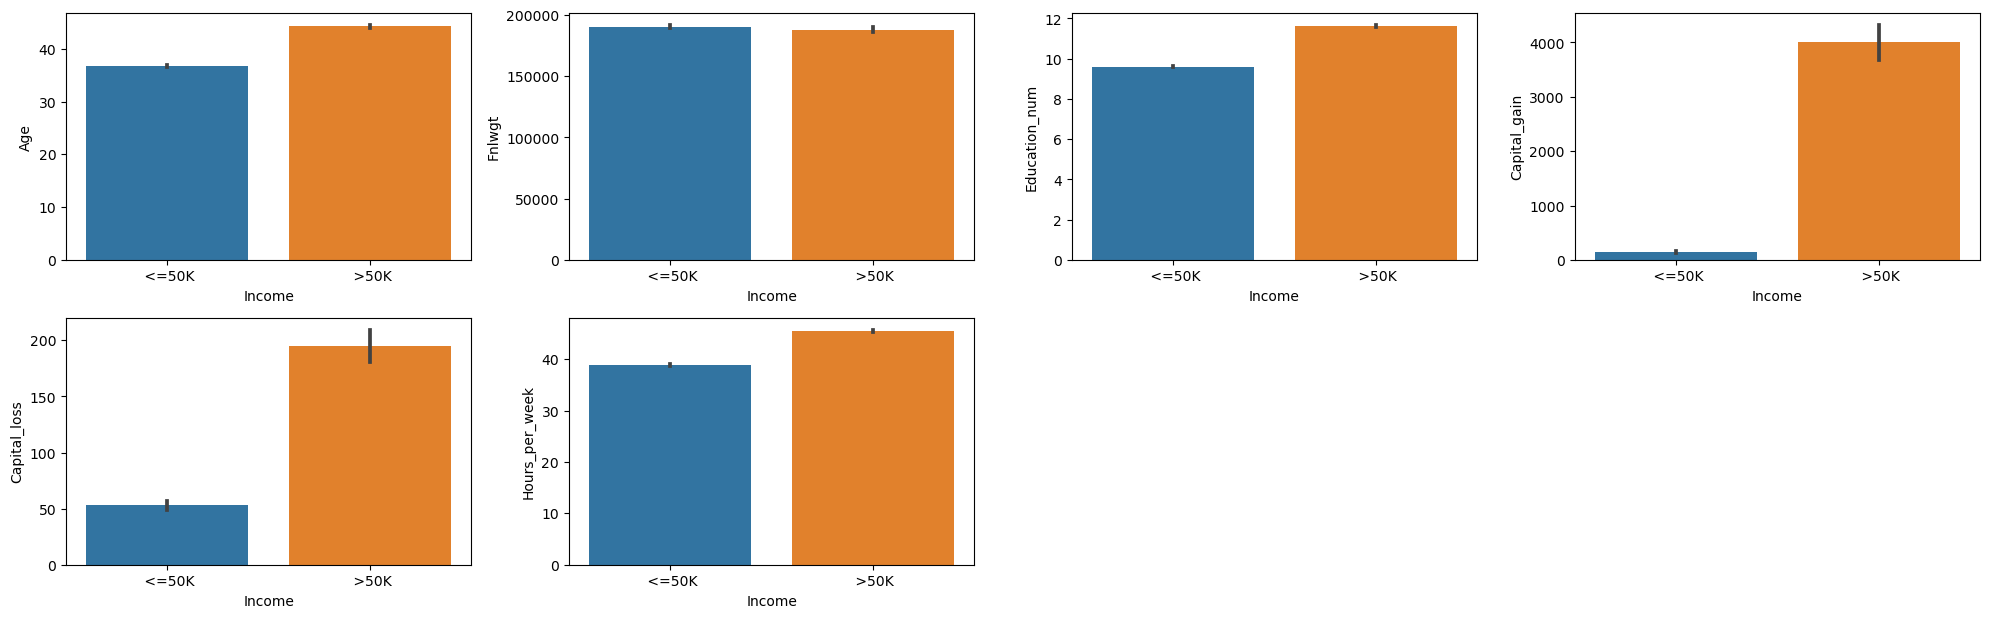

In [51]:
#Comparing Income vs Numerical columns

plt.figure(figsize=(20,15), facecolor='white')
p=1

for i in num_columns:
    if p<=20:    
        plt.subplot(5,4,p) 
        sns.barplot(x='Income',y=i,data=df)
        plt.xlabel("Income")
        plt.ylabel(i)
    p+=1
    
plt.tight_layout()
plt.show()

- Older people are more likely to make more than 50K.
- There is no obvious relation between Income and Fnlwhg as the count is the same.
- The higher the education is it is more likely to make more than 50K.
- People with higher Capital gains are more likely to make 50K.
- People with higher Capital loss are more likely to make 50K.
- People working more hours a week are more likly to make 50K.

## Multivariate Analysis

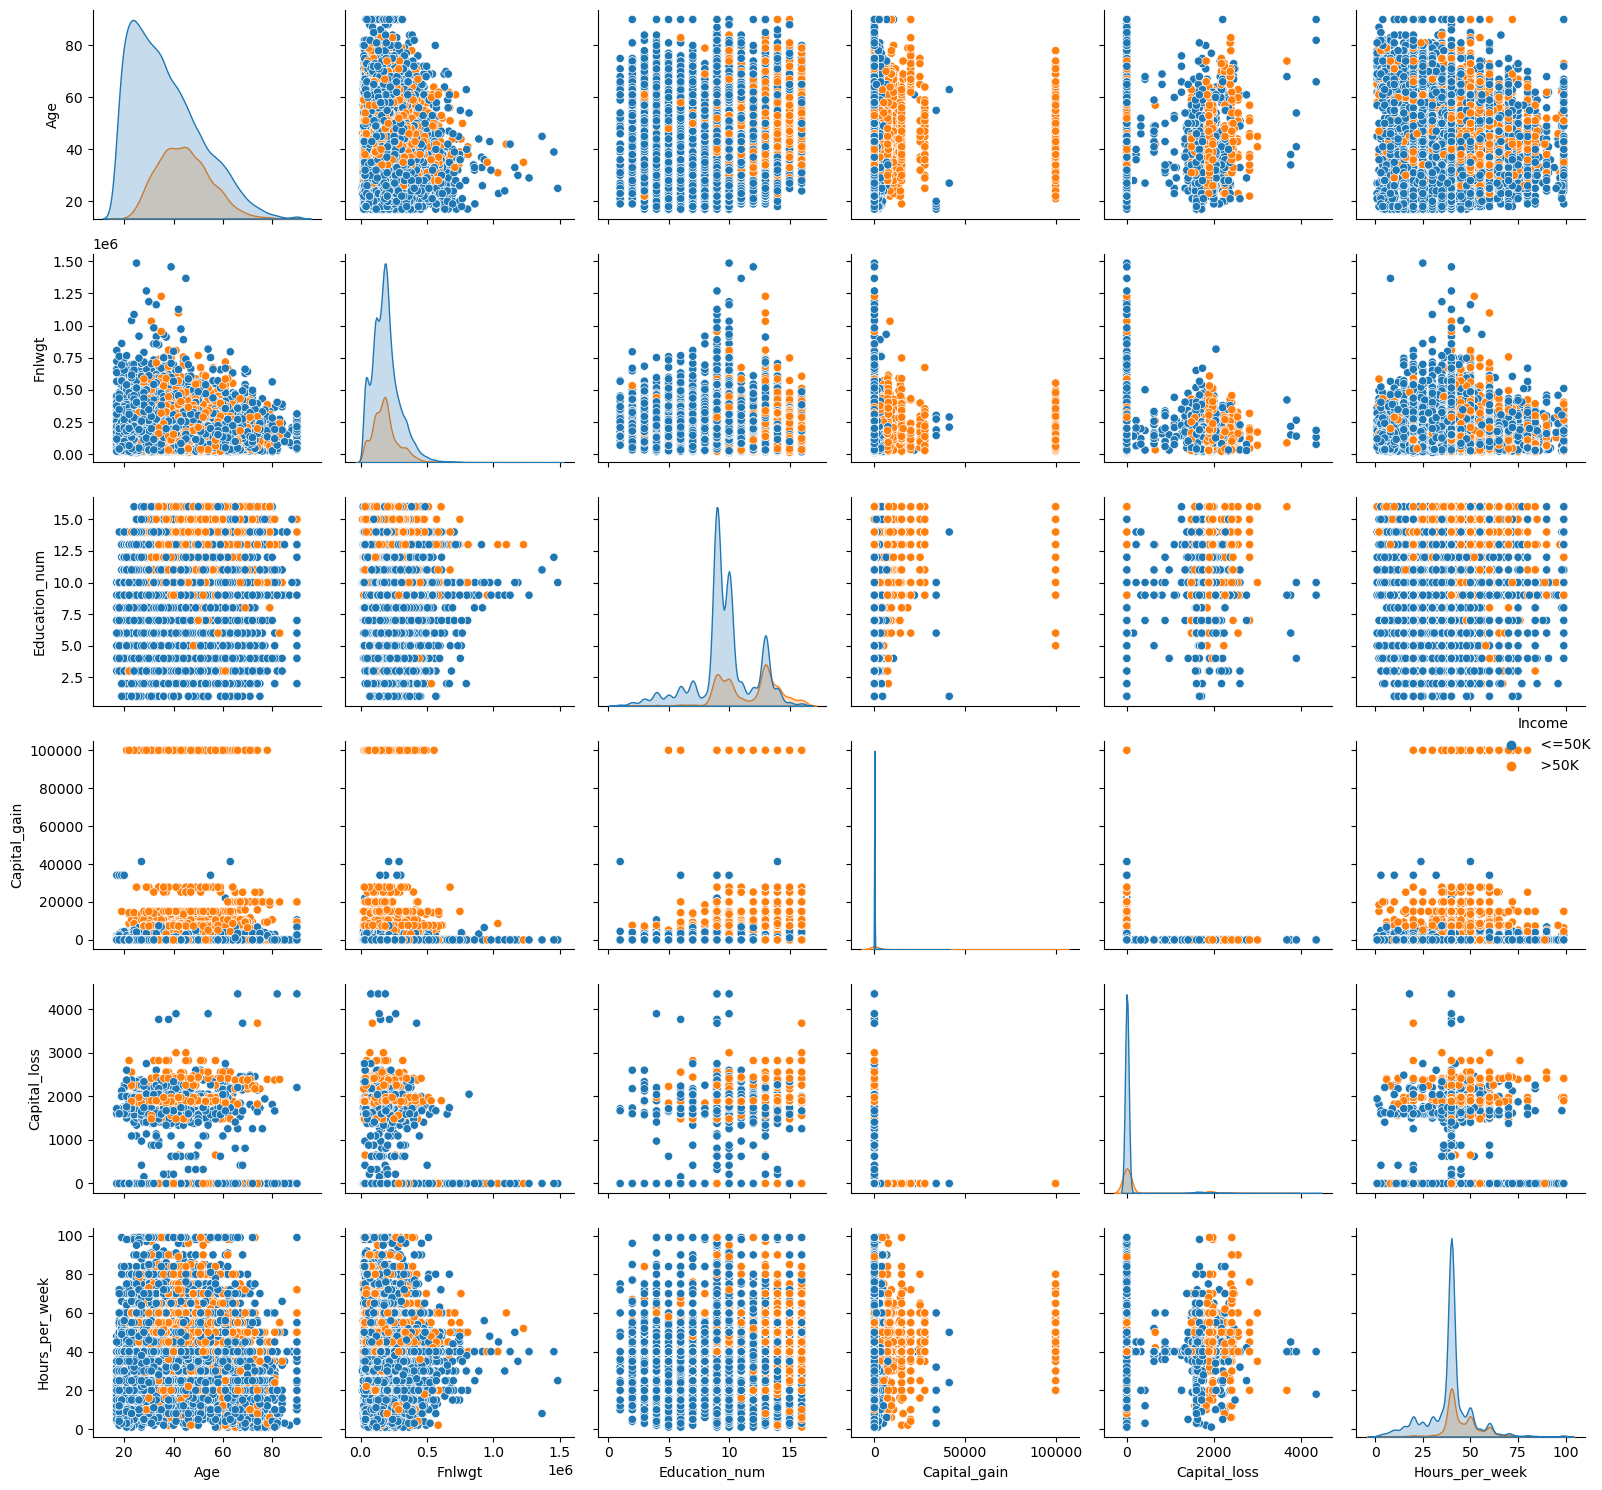

In [52]:
sns.pairplot(df, hue='Income')
plt.tight_layout()

## Checking for outliers

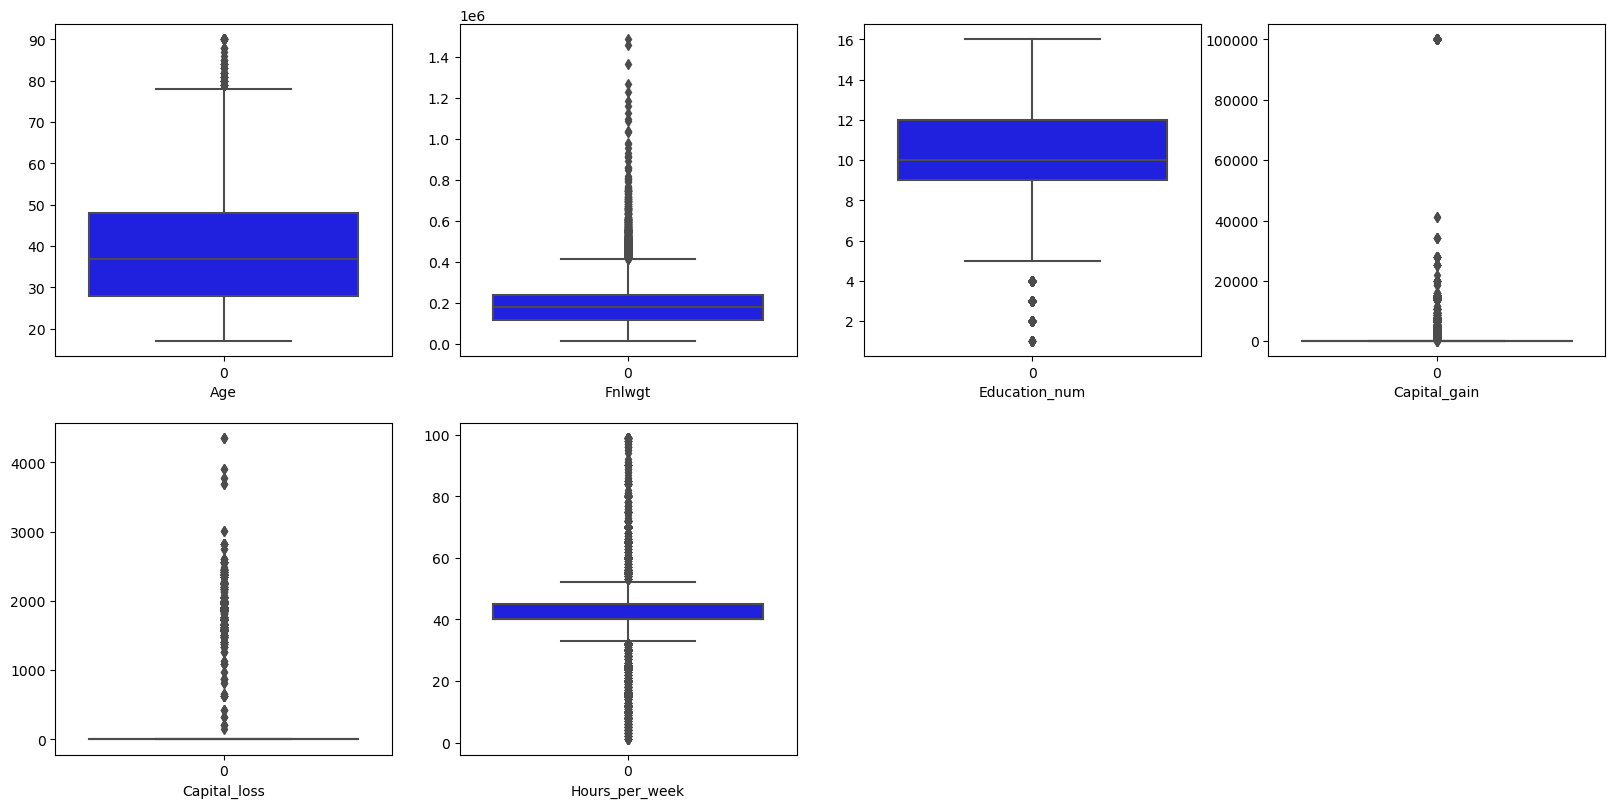

In [53]:
# Checking for outliers only for numerical columns

plt.figure(figsize=(20,25))
pnum=1
for i in num_columns:
    if pnum<=20:
        plt.subplot(5,4,pnum)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i)
    pnum+=1
plt.show()

As we can see there is outliers presented in all columns.

## Removing the outliers

In [54]:
from scipy.stats import zscore

outliers=df[num_columns]

z=np.abs(zscore(outliers))
z

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,0.836961,1.008703,1.134817,0.145969,0.216747,2.222450
1,0.042934,0.245008,0.420646,0.145969,0.216747,0.035664
2,1.056935,0.425720,1.198377,0.145969,0.216747,0.035664
3,0.776180,1.408036,1.134817,0.145969,0.216747,0.035664
4,0.116259,0.898091,1.523683,0.145969,0.216747,0.035664
...,...,...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.145969,0.216747,0.197648
32556,0.103715,0.335469,0.420646,0.145969,0.216747,0.035664
32557,1.423558,0.358812,0.420646,0.145969,0.216747,0.035664
32558,1.216128,0.110897,0.420646,0.145969,0.216747,1.655506


In [55]:
threshold=3
print(np.where(z>3))

(array([    9,    22,    27, ..., 32500, 32500, 32506], dtype=int64), array([5, 4, 5, ..., 0, 5, 5], dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]  
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2,728 rows have been removed as ouliers.

In [57]:
# Checking the data loss percentage after removing the outliers

print("Data Loss Percentage:", ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)  

Data Loss Percentage: 8.384558642734202


## Checking for skewness

In [58]:
df_new.skew()

Age                0.491125
Fnlwgt             0.635160
Education_num     -0.169811
Capital_gain       4.941892
Capital_loss      29.651762
Hours_per_week    -0.353124
dtype: float64

In [59]:
df=df_new

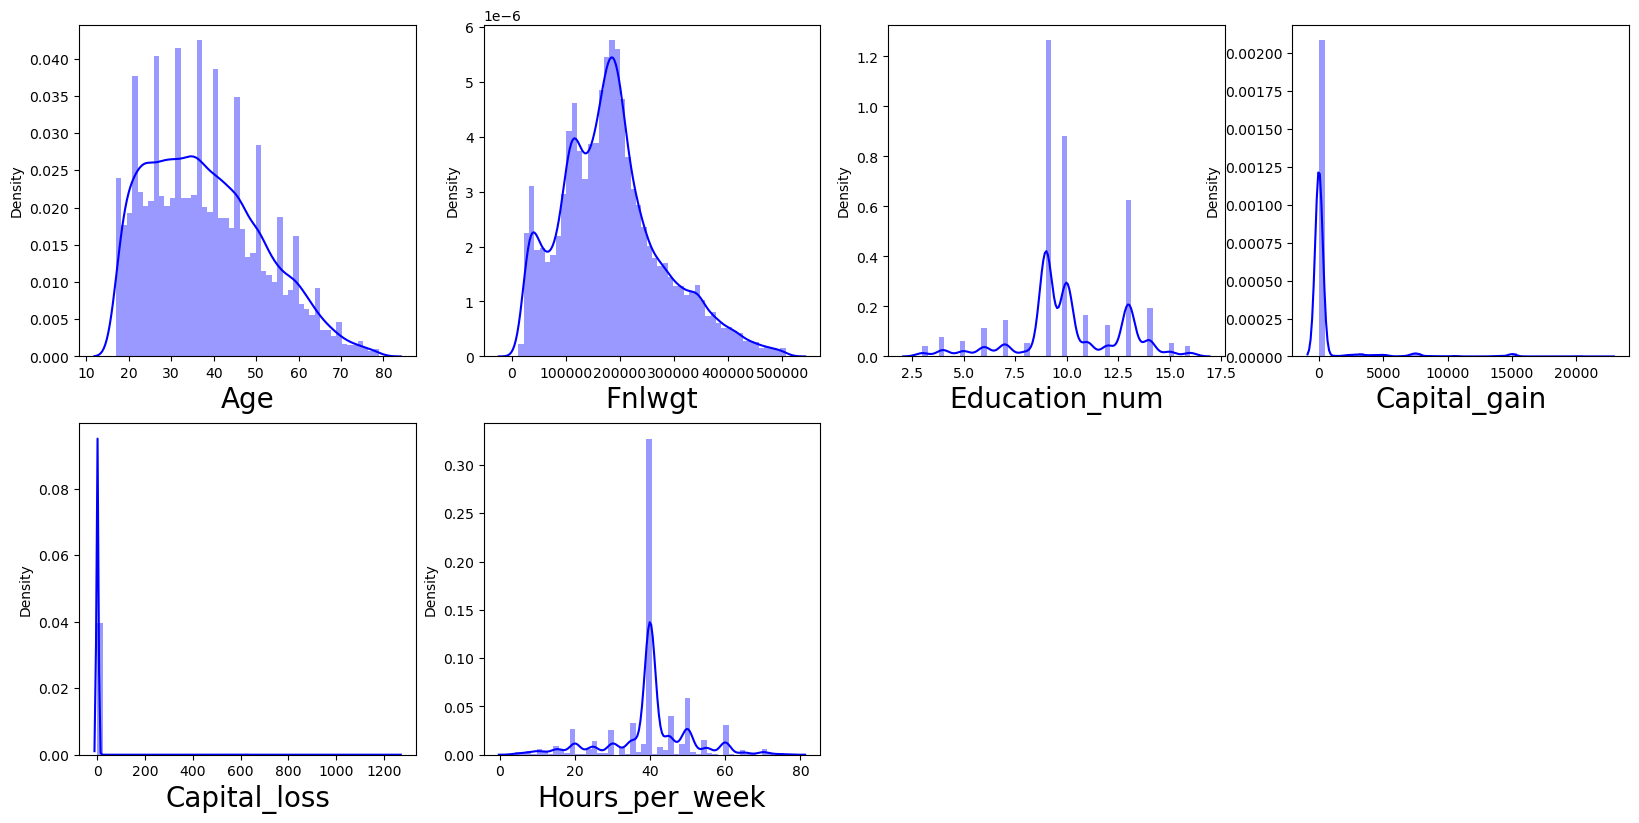

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(20,25), facecolor='white')

plotnumber=1

for i in num_columns:   
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        sns.distplot(df[i],color='b')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()
plt.tight_layout()

In Capital_loss and Capital_gain columns the data is skewed to the right, in Fnlwgt and Age the data is slightly skewed to the right.

## Removing of skewness

In [61]:
df['Age'] = df['Age'].apply(lambda x: np.cbrt(x))
df['Fnlwgt'] = df['Fnlwgt'].apply(lambda x: np.cbrt(x))
df['Capital_loss'] = df['Capital_loss'].apply(lambda x: np.cbrt(x))
df['Capital_gain'] = df['Capital_gain'].apply(lambda x: np.cbrt(x))

In [62]:
df.skew()

Age                0.067867
Fnlwgt            -0.376919
Education_num     -0.169811
Capital_gain       3.373773
Capital_loss      25.757548
Hours_per_week    -0.353124
dtype: float64

In some features the skewness hasn't been removed complately but it has been reduced.

## Encoding categorical data

In [64]:
# Encoding the categorical data into numerical using Label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])

In [65]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.684031,5,43.675121,8,13,2,3,0,4,1,0.0,0.0,13,37,0
1,3.361975,3,59.967204,10,9,0,5,1,4,1,0.0,0.0,40,37,0
2,3.756286,3,61.685627,1,7,2,5,0,2,1,0.0,0.0,40,37,0
3,3.036589,3,69.686283,8,13,2,9,5,2,0,0.0,0.0,40,4,0
4,3.332222,3,65.776255,11,14,2,3,5,4,0,0.0,0.0,40,37,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29808 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             29808 non-null  float64
 1   Workclass       29808 non-null  int32  
 2   Fnlwgt          29808 non-null  float64
 3   Education       29808 non-null  int32  
 4   Education_num   29808 non-null  int64  
 5   Marital_status  29808 non-null  int32  
 6   Occupation      29808 non-null  int32  
 7   Relationship    29808 non-null  int32  
 8   Race            29808 non-null  int32  
 9   Sex             29808 non-null  int32  
 10  Capital_gain    29808 non-null  float64
 11  Capital_loss    29808 non-null  float64
 12  Hours_per_week  29808 non-null  int64  
 13  Native_country  29808 non-null  int32  
 14  Income          29808 non-null  int32  
dtypes: float64(4), int32(9), int64(2)
memory usage: 2.6 MB


In [67]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000,29808.000000
mean,3.320214,3.086353,55.145626,9.153717,10.078268,2.621410,6.111715,1.479703,3.664822,0.660930,1.474552,0.014276,39.898987,35.503053,0.223162
std,0.393461,1.104524,10.410535,3.392130,2.452750,1.514699,3.987130,1.610094,0.850723,0.473402,5.115446,0.360299,11.137401,5.819127,0.416373
min,2.571282,0.000000,23.074115,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,3.000000,3.000000,48.982327,8.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,3.332222,3.000000,56.217690,10.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,3.608826,3.000000,61.646181,11.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,4.290840,7.000000,79.709152,13.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,28.037365,10.795105,77.000000,39.000000,1.000000


## Checking the correlation between the target variable and the independent variables.

In [68]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.030628,-0.062624,0.009369,0.066798,-0.322567,-0.011425,-0.280995,0.022208,0.096387,0.133951,0.020389,0.140167,-0.004188,0.260980
Workclass,0.030628,1.000000,-0.023910,0.002653,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.006438,-0.010121,0.027270,-0.001685,-0.007180
Fnlwgt,-0.062624,-0.023910,1.000000,-0.022912,-0.034395,0.026919,-0.003500,0.010751,-0.006228,0.022693,-0.001312,0.000502,-0.016579,-0.062917,-0.003924
Education,0.009369,0.002653,-0.022912,1.000000,0.361097,-0.037416,-0.042764,-0.012924,0.015588,-0.027878,0.023299,-0.000950,0.060787,0.071462,0.074621
Education_num,0.066798,-0.000674,-0.034395,0.361097,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.131687,0.009050,0.150713,0.058248,0.318731
Marital_status,-0.322567,-0.016093,0.026919,-0.037416,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.070817,-0.015995,-0.195162,-0.016736,-0.194355
Occupation,-0.011425,0.008216,-0.003500,-0.042764,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.007770,-0.000928,-0.022743,-0.001708,0.030533
Relationship,-0.280995,-0.057609,0.010751,-0.012924,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.091493,0.034251,-0.257798,-0.011165,-0.245913
Race,0.022208,0.045442,-0.006228,0.015588,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.025621,0.000126,0.045400,0.117269,0.071755
Sex,0.096387,0.068831,0.022693,-0.027878,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.071881,-0.031002,0.233755,0.002282,0.209946


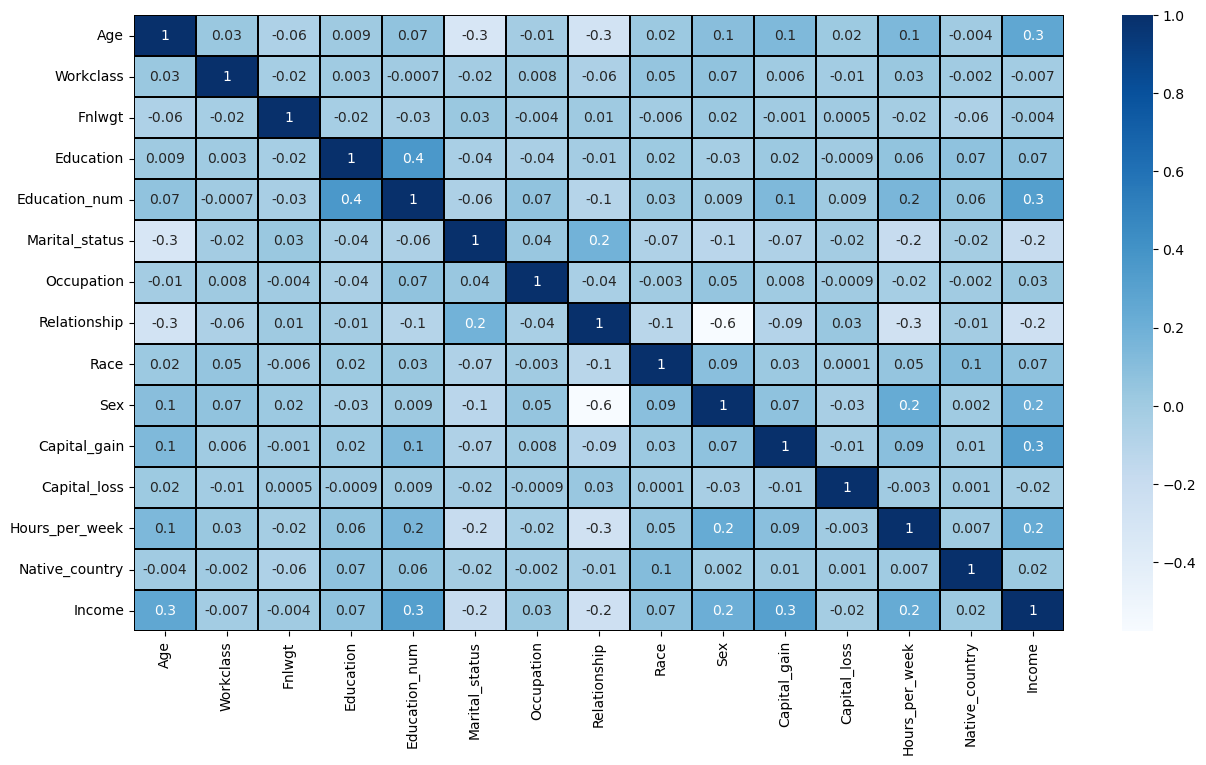

In [69]:
# Vusualizing the correlation

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g',linecolor='black', annot = True, cmap = 'Blues')
plt.yticks(rotation=0);
plt.show()

In [70]:
cor_region=cor['Income'].sort_values(ascending=False)
cor_region

Income            1.000000
Education_num     0.318731
Capital_gain      0.312007
Age               0.260980
Hours_per_week    0.230589
Sex               0.209946
Education         0.074621
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Fnlwgt           -0.003924
Workclass        -0.007180
Capital_loss     -0.017357
Marital_status   -0.194355
Relationship     -0.245913
Name: Income, dtype: float64

- There is positive correlation (0.3) between age and Income, which means with the increase of the age is more likely to receive higher income.
- There is positive correlation (0.3) between Education_num (numerical representation of Education) and Income, which means individuals with higher education are more likely to earn higher income.
- There is positive correlation (0.3) between Capital_gain and Income, which means higher capital gains are associated with higher incomes.
- There is a moderate positive correlation (0.2) between hours worked per week and income. Longer working hours are associated with higher incomes.
- There is a moderate negative correlation (-0.2) between Marital status and income. Individuals who are married are less likely to have higher income compared to those who are not married.
- There is a moderate negative correlation (-0.2) between Relationship and income. This suggests that certain relationship types may be associated with lower income.



## Visualizing correlation with the target Income

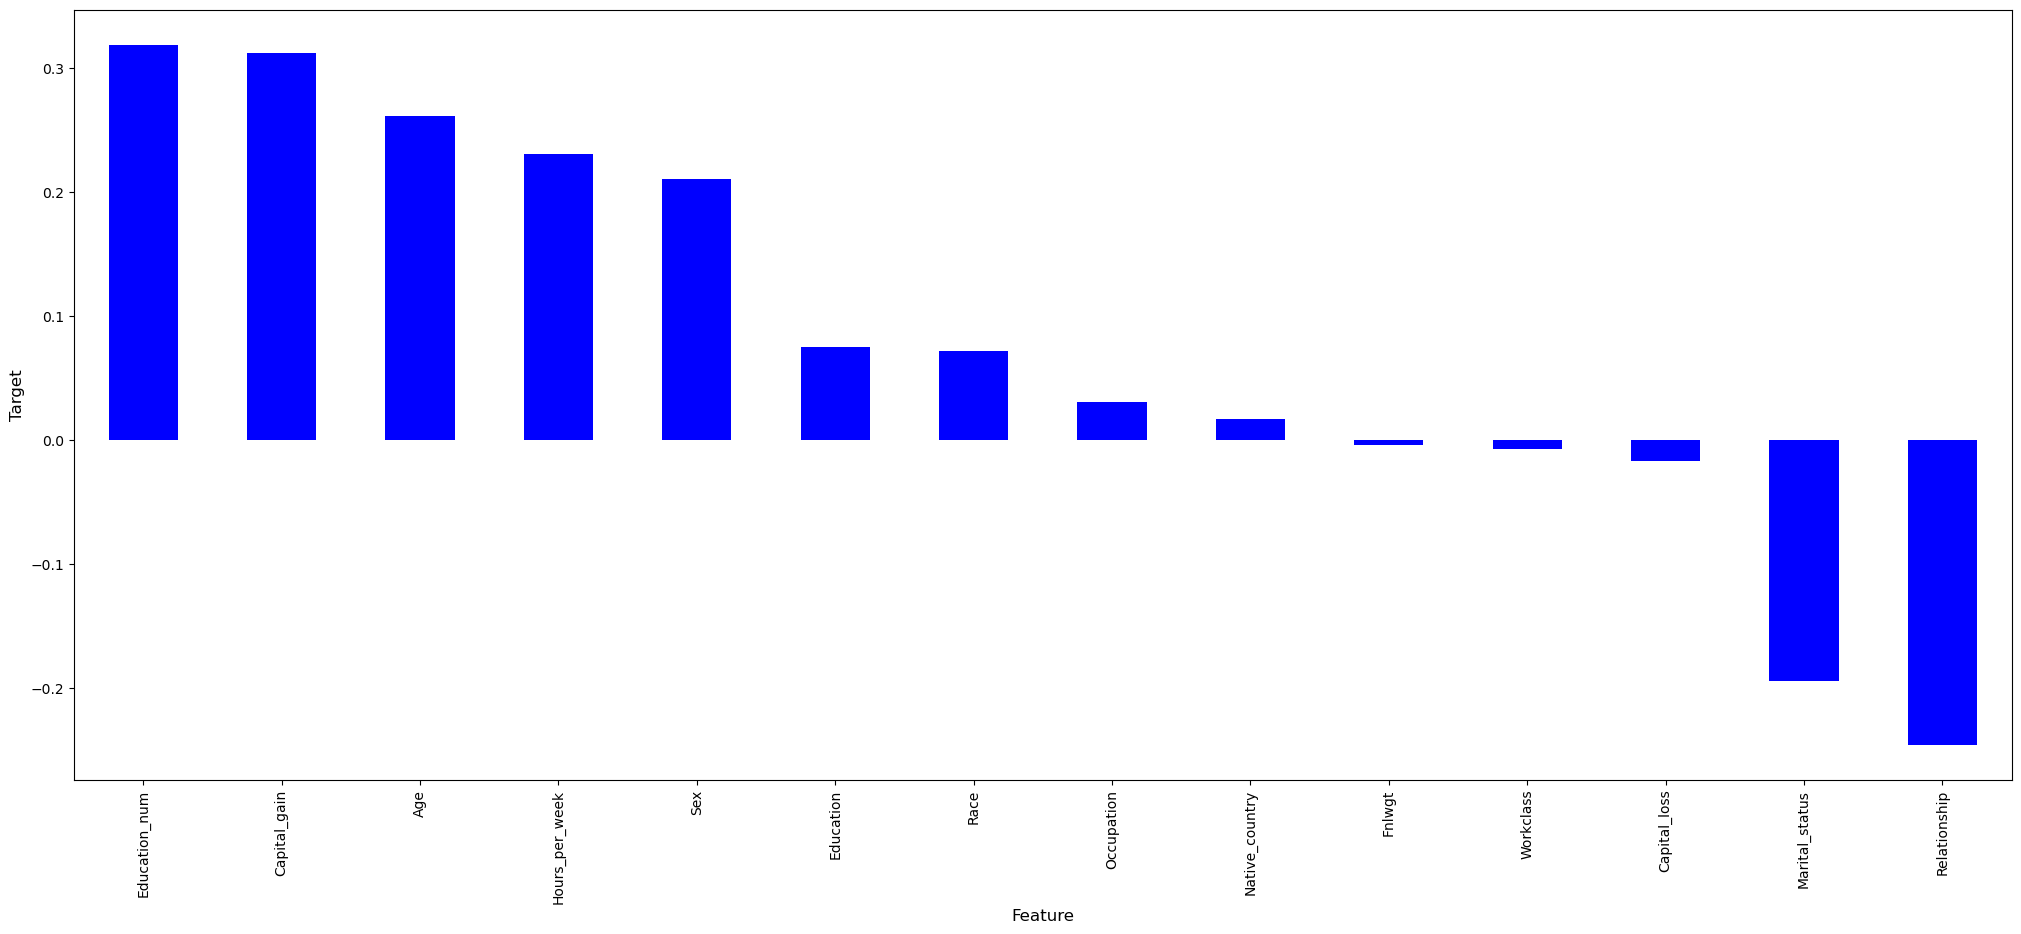

In [71]:
plt.figure(figsize=(25,10))

df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='b')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.show()

We can see that Fnlwgh and Workclass have very low correlation with the target Income, so we can drop them.

In [72]:
# dropping  Fnlwgh and Workclass

df.drop(columns = ['Fnlwgt','Workclass'],axis=1,inplace=True)

# Classification Task

## Separating features and label

In [73]:
x=df.drop(['Income'],axis=1)
y=df['Income']

## Feature Scaling using Standard Scalarization

In [74]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.924676,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.28826,-0.039624,-2.415235,0.257250
1,0.106141,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.28826,-0.039624,0.009070,0.257250
2,1.108316,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.28826,-0.039624,0.009070,0.257250
3,-0.720858,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.28826,-0.039624,0.009070,-5.413799
4,0.030519,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.28826,-0.039624,0.009070,0.257250
...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.813853,-0.929731,0.783514,-0.410260,1.476848,2.186429,0.393999,-1.396153,-0.28826,-0.039624,-0.170508,0.257250
29804,0.253493,0.249488,-0.439623,-0.410260,-0.028019,-0.919032,0.393999,0.716254,-0.28826,-0.039624,0.009070,0.257250
29805,1.399559,0.249488,-0.439623,2.230572,-1.532886,1.565337,0.393999,-1.396153,-0.28826,-0.039624,0.009070,0.257250
29806,-1.316988,0.249488,-0.439623,0.910156,-1.532886,0.944244,0.393999,0.716254,-0.28826,-0.039624,-1.786711,0.257250


## Checking Variance Inflation Factor VIF

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,1.210486,Age
1,1.162229,Education
2,1.211363,Education_num
3,1.157736,Marital_status
4,1.016367,Occupation
5,1.675203,Relationship
6,1.031395,Race
7,1.546316,Sex
8,1.041054,Capital_gain
9,1.002841,Capital_loss


VIF is low.

## Oversampling

In [76]:
y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

We have imbalanced data.

In [77]:
# Balancing the imbalanced data

from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [78]:
y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

# Machine Learning

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"at random_state",maxRS)

Best accuracy is 0.8859219807110983 at random_state 100


In [81]:
x.head()

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.924676,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.28826,-0.039624,-2.415235,0.257250
1,0.106141,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.28826,-0.039624,0.009070,0.257250
2,1.108316,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.28826,-0.039624,0.009070,0.257250
3,-0.720858,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.28826,-0.039624,0.009070,-5.413799
4,0.030519,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.28826,-0.039624,0.009070,0.257250


In [82]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=maxRS)

In [84]:
x_train.shape

(32418, 12)

In [85]:
y_train.shape

(32418,)

In [86]:
x_test.shape

(13894, 12)

In [87]:
y_test.shape

(13894,)

## Random Forest Classifier

In [88]:
rfc=RandomForestClassifier(n_estimators=200, random_state=maxRS)

In [89]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [90]:
rfcpred= rfc.predict(x_test)

In [91]:
print(classification_report(y_test,rfcpred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7002
           1       0.88      0.89      0.89      6892

    accuracy                           0.89     13894
   macro avg       0.89      0.89      0.89     13894
weighted avg       0.89      0.89      0.89     13894



In [92]:
print('Accuracy Score of RFC: ', accuracy_score(y_test, rfcpred))

Accuracy Score of RFC:  0.8852742190873758


In [93]:
print(confusion_matrix(y_test, rfcpred))

[[6146  856]
 [ 738 6154]]


## GaussianNB

In [94]:
gnb=GaussianNB()

In [95]:
gnb.fit(x_train,y_train)

GaussianNB()

In [96]:
gnbpred= rfc.predict(x_test)

In [97]:
print(confusion_matrix(y_test, gnbpred))

[[6146  856]
 [ 738 6154]]


In [98]:
print(classification_report(y_test,gnbpred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7002
           1       0.88      0.89      0.89      6892

    accuracy                           0.89     13894
   macro avg       0.89      0.89      0.89     13894
weighted avg       0.89      0.89      0.89     13894



In [99]:
print('Accuracy Score of GaussianNB: ', accuracy_score(y_test, gnbpred))

Accuracy Score of GaussianNB:  0.8852742190873758


## KNN

In [100]:
knn=KNeighborsClassifier(n_neighbors=13)

In [102]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [104]:
knnpred=knn.predict(x_test)

In [105]:
print(confusion_matrix(y_test, knnpred))

[[5373 1629]
 [ 618 6274]]


In [106]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      7002
           1       0.79      0.91      0.85      6892

    accuracy                           0.84     13894
   macro avg       0.85      0.84      0.84     13894
weighted avg       0.85      0.84      0.84     13894



In [107]:
print('Accuracy Score of KNN: ', accuracy_score(y_test, knnpred))

Accuracy Score of KNN:  0.8382755146106233


## Logistic regression

In [108]:
LR=LogisticRegression()

In [109]:
LR.fit(x_train,y_train)

LogisticRegression()

In [110]:
LRpred=LR.predict(x_test)

In [111]:
print(confusion_matrix(y_test, LRpred))

[[5234 1768]
 [1522 5370]]


In [112]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      7002
           1       0.75      0.78      0.77      6892

    accuracy                           0.76     13894
   macro avg       0.76      0.76      0.76     13894
weighted avg       0.76      0.76      0.76     13894



In [113]:
print('Accuracy Score of Logistic Regression: ', accuracy_score(y_test, LRpred))

Accuracy Score of Logistic Regression:  0.7632071397725637


## Decision Tree

In [114]:
dtc=DecisionTreeClassifier()

In [115]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [116]:
dtcpred=dtc.predict(x_test)

In [117]:
print(confusion_matrix(y_test, dtcpred))

[[6052  950]
 [1056 5836]]


In [118]:
print(classification_report(y_test,dtcpred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      7002
           1       0.86      0.85      0.85      6892

    accuracy                           0.86     13894
   macro avg       0.86      0.86      0.86     13894
weighted avg       0.86      0.86      0.86     13894



In [119]:
print('Accuracy Score of Decision Tree Classifier: ', accuracy_score(y_test, dtcpred))

Accuracy Score of Decision Tree Classifier:  0.855621131423636


## Support Vector Classifier

In [120]:
svc=SVC()

In [121]:
svc.fit(x_train,y_train)

SVC()

In [122]:
svcpred=svc.predict(x_test)

In [123]:
print(confusion_matrix(y_test, svcpred))

[[5385 1617]
 [ 778 6114]]


In [124]:
print(classification_report(y_test,svcpred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      7002
           1       0.79      0.89      0.84      6892

    accuracy                           0.83     13894
   macro avg       0.83      0.83      0.83     13894
weighted avg       0.83      0.83      0.83     13894



In [125]:
print('Accuracy Score of SVC: ', accuracy_score(y_test, svcpred))

Accuracy Score of SVC:  0.827623434576076


## AdaBoostClassifier

In [126]:
abc=AdaBoostClassifier()

In [127]:
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [128]:
abcpred=abc.predict(x_test)

In [129]:
print(confusion_matrix(y_test, svcpred))

[[5385 1617]
 [ 778 6114]]


In [130]:
print(classification_report(y_test,abcpred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      7002
           1       0.83      0.86      0.84      6892

    accuracy                           0.84     13894
   macro avg       0.84      0.84      0.84     13894
weighted avg       0.84      0.84      0.84     13894



In [131]:
print('Accuracy Score of ABC: ', accuracy_score(y_test, abcpred))

Accuracy Score of ABC:  0.8424499784079459


## GradientBoostingClassifier

In [132]:
gb=GradientBoostingClassifier()

In [133]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [134]:
gbpred=gb.predict(x_test)

In [135]:
print(confusion_matrix(y_test, gbpred))

[[5785 1217]
 [ 755 6137]]


In [136]:
print(classification_report(y_test,gbpred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7002
           1       0.83      0.89      0.86      6892

    accuracy                           0.86     13894
   macro avg       0.86      0.86      0.86     13894
weighted avg       0.86      0.86      0.86     13894



In [137]:
print('Accuracy Score of GBC: ', accuracy_score(y_test, gbpred))

Accuracy Score of GBC:  0.8580682308910321


## BaggingClassifier

In [138]:
bc=BaggingClassifier()

In [139]:
bc.fit(x_train,y_train)

BaggingClassifier()

In [140]:
bcpred=bc.predict(x_test)

In [147]:
print(confusion_matrix(y_test, bcpred))

[[6175  827]
 [ 951 5941]]


In [142]:
print(classification_report(y_test,bcpred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      7002
           1       0.88      0.86      0.87      6892

    accuracy                           0.87     13894
   macro avg       0.87      0.87      0.87     13894
weighted avg       0.87      0.87      0.87     13894



In [143]:
print('Accuracy Score of BC: ', accuracy_score(y_test, bcpred))

Accuracy Score of BC:  0.8720310925579386


## Extra Trees Classifier

In [144]:
et=ExtraTreesClassifier()

In [145]:
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [146]:
etpred=et.predict(x_test)

In [148]:
print(confusion_matrix(y_test, etpred))

[[6146  856]
 [ 762 6130]]


In [149]:
print(classification_report(y_test,etpred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7002
           1       0.88      0.89      0.88      6892

    accuracy                           0.88     13894
   macro avg       0.88      0.88      0.88     13894
weighted avg       0.88      0.88      0.88     13894



In [150]:
print('Accuracy Score of ETC: ', accuracy_score(y_test, etpred))

Accuracy Score of ETC:  0.8835468547574492


## Cross Validation Score

In [157]:
from sklearn.model_selection import cross_val_score

In [158]:
# CV score for RandomForest Classifier

score=cross_val_score(rfc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, rfcpred) - score.mean())

Score:  [0.81140019 0.86688978 0.91125027 0.9135176  0.9081192 ]
Mean Score:  0.8822354072560816
Std deviation:  0.03935358711320299
Difference between Accuracy score and CV Score is   0.0030388118312941748


In [159]:
# CV score for Support Vector Classifier

score=cross_val_score(svc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, svcpred) - score.mean())

Score:  [0.8232754  0.82165605 0.82854675 0.82800691 0.83221766]
Mean Score:  0.8267405542766639
Std deviation:  0.003813770241830376
Difference between Accuracy score and CV Score is   0.000882880299412081


In [160]:
# CV score for DecisionTree Classifier

score=cross_val_score(dtc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, dtcpred) - score.mean())

Score:  [0.76379143 0.83644608 0.88609372 0.88501404 0.88533794]
Mean Score:  0.851336639224702
Std deviation:  0.04771625035857875
Difference between Accuracy score and CV Score is   0.004284492198934009


In [161]:
# CV score for KNN Classifier

score=cross_val_score(knn,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, knnpred) - score.mean())

Score:  [0.82187196 0.83277556 0.84074714 0.84096307 0.83999136]
Mean Score:  0.8352698197468712
Std deviation:  0.0073543324624775
Difference between Accuracy score and CV Score is   0.0030056948637521286


In [162]:
# CV score for GNB Classifier

score=cross_val_score(gnb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, gnbpred) - score.mean())

Score:  [0.7514844  0.77458707 0.7722954  0.77143166 0.77164759]
Mean Score:  0.7682892232462292
Std deviation:  0.008476649012947625
Difference between Accuracy score and CV Score is   0.11698499584114663


In [163]:
# CV score for AB Classifier

score=cross_val_score(abc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, abcpred) - score.mean())

Score:  [0.8098888  0.83946885 0.84841287 0.85445908 0.84960052]
Mean Score:  0.8403660255309975
Std deviation:  0.015989419235191094
Difference between Accuracy score and CV Score is   0.002083952876948403


In [165]:
# CV score for GB Classifier

score=cross_val_score(gb,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, gbpred) - score.mean())

Score:  [0.81809349 0.84918493 0.86590369 0.86946664 0.86363636]
Mean Score:  0.8532570227074169
Std deviation:  0.01888637900780678
Difference between Accuracy score and CV Score is   0.004811208183615245


In [166]:
# CV score for Bagging Classifier

score=cross_val_score(bc,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, bcpred) - score.mean())

Score:  [0.78009284 0.85674188 0.90498812 0.90801123 0.90326063]
Mean Score:  0.87061894116349
Std deviation:  0.049055991475691056
Difference between Accuracy score and CV Score is   0.001412151394448613


In [167]:
# CV score for Extra Tree Classifier

score=cross_val_score(et,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, etpred) - score.mean())

Score:  [0.82780956 0.87099212 0.9135176  0.91438134 0.908767  ]
Mean Score:  0.8870935261998678
Std deviation:  0.03372369973059354
Difference between Accuracy score and CV Score is   -0.003546671442418603


In [168]:
# CV score for Logistic Regression

score=cross_val_score(LR,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())
print('Difference between Accuracy score and CV Score is  ', accuracy_score(y_test, LRpred) - score.mean())

Score:  [0.75860952 0.76627443 0.76808465 0.76365796 0.7594472 ]
Mean Score:  0.7632147509404689
Std deviation:  0.003706115856228507
Difference between Accuracy score and CV Score is   -7.611167905152705e-06


In [170]:
model_performance = {
        "Model": ['rfc', 'gnb', 'knn', 'LR', 'dtc', 'svc', 'abc', 'gb', 'bc', 'et'],
        "Accuracy": [0.89, 0.89, 0.84, 0.76, 0.86, 0.83, 0.84, 0.86, 0.87, 0.88],
        "Cross Validation Score": [0.88, 0.77,0.84, 0.76, 0.85, 0.82, 0.84, 0.85, 0.87, 0.89],
        "Difference between Accuracy and CV score": [0.003, 0.117, 0.003, -7.61, 0.004, 0.001, 0.002, 0.005, 0.001, 0.04]}

model_performance_df = pd.DataFrame(model_performance)

model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

,Model,Accuracy,Cross Validation Score,Difference between Accuracy and CV score
0,rfc,0.89,0.88,0.003
1,gnb,0.89,0.77,0.117
9,et,0.88,0.89,0.040
8,bc,0.87,0.87,0.001
4,dtc,0.86,0.85,0.004
7,gb,0.86,0.85,0.005
2,knn,0.84,0.84,0.003
6,abc,0.84,0.84,0.002
5,svc,0.83,0.82,0.001
3,LR,0.76,0.76,-7.610


The best 2 models are Random Forest Classifier and Extra Tree Classifier. They give us good accuracy (0.89), the difference between the accuracy and the cross validation score is low, the cross validation score (0.88 for RFC and 0.89 for ETC)  suggests that the model's performance is relatively consistent during cross-validation.

## Hyper Parameter Tuning for ExtraTree Classifier

In [171]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_et = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [175]:
GSCV_et=GridSearchCV(ExtraTreesClassifier(),param_et,cv=5)

In [176]:
GSCV_et.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200]})

In [177]:
GSCV_et.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [178]:
Final_model_classification=ExtraTreesClassifier(criterion= 'gini', max_depth= 5, max_features= 'log2', min_samples_leaf= 2, n_estimators= 200)
Final_model_classification.fit(x_train, y_train)
prediction=Final_model_classification.predict(x_test)

print("R2 score:",r2_score(y_test,prediction))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("Accuracy score", accuracy_score(y_test, prediction) *100)

R2 score: 0.1685098511775842
Mean Absolute Error: 0.20785950770116596
Mean Squared Error: 0.20785950770116596
Root Mean Squared Error: 0.45591611915040464
Accuracy score 79.2140492298834


## Hyper Parameter Tuning for RandomForest Classifier

In [179]:
param_rf={'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']}

In [180]:
GSCV_rf=GridSearchCV(RandomForestClassifier(),param_rf,cv=5)

In [181]:
GSCV_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]})

In [182]:
GSCV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [183]:
Final_model_rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, max_features= 'sqrt', min_samples_leaf= 2, n_estimators= 200)
Final_model_rf.fit(x_train, y_train)
prediction1=Final_model_rf.predict(x_test)

print("R2 score:",r2_score(y_test,prediction1))
print("Mean Absolute Error:",mean_absolute_error(y_test,prediction1))
print("Mean Squared Error:",mean_squared_error(y_test,prediction1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction1)))
print("Accuracy score", accuracy_score(y_test, prediction1) *100)

R2 score: 0.5416439345826571
Mean Absolute Error: 0.11458183388513027
Mean Squared Error: 0.11458183388513027
Root Mean Squared Error: 0.33849938535413954
Accuracy score 88.54181661148696


# ROC-AUC Curve

In [192]:
from sklearn import metrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [193]:
fpr, tpr, thresholds =roc_curve(y_test, prediction, pos_label=1)

In [194]:
fpr

array([0.        , 0.26406741, 1.        ])

In [195]:
tpr

array([0.       , 0.8492455, 1.       ])

In [196]:
roc_auc=metrics.auc(fpr,tpr)

In [198]:
#ROC-AUC Curve for Extra Tree Classifier

display_et=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model_classification)

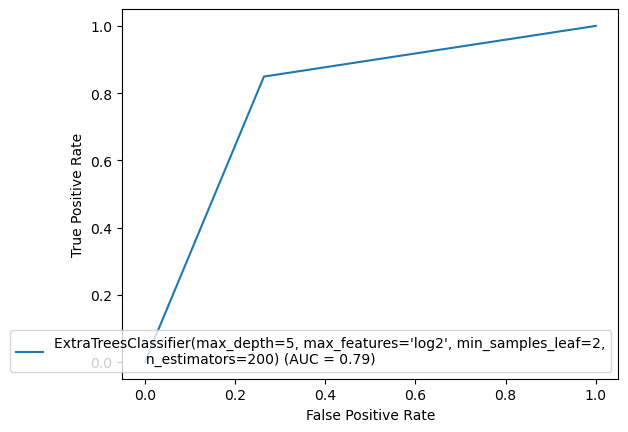

In [199]:
display_et.plot()

In [202]:
#ROC-AUC Curve for Random Forest Classifier

display_rf=metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=Final_model_rf)

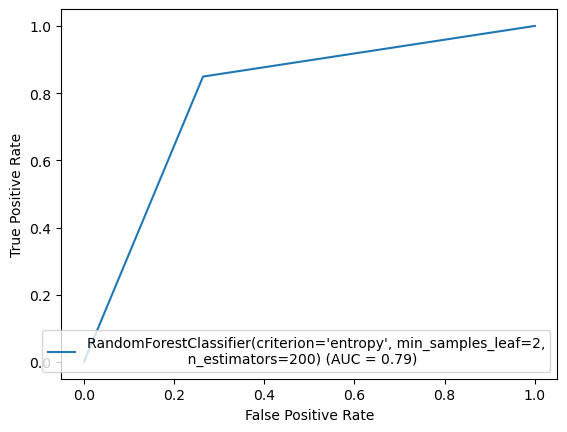

In [203]:
display_rf.plot()

In [215]:
# Cofusion matrix for Random Forest

print(confusion_matrix(y_test, rfcpred))

[[6146  856]
 [ 738 6154]]


In [216]:
# Confusion matrix for Extra Tree

print(confusion_matrix(y_test, etpred))

[[6146  856]
 [ 762 6130]]


It turns out that Random Forest is the better model.

# Saving the model

In [204]:
import joblib

joblib.dump(Final_model_rf,'Census-Income-rf.pkl')

['Census-Income-rf.pkl']

# Predicting the saved model

In [217]:
# Loading the saved model
model= joblib.load('Census-Income-rf.pkl')

#Prediction
prediction = model_rf.predict(x_test)
prediction

array([0, 1, 1, ..., 1, 0, 0])

In [218]:
data=pd.DataFrame({'Original': a, 'Predicted': prediction})
print(data)

       Original  Predicted
0             0          0
1             1          1
2             1          1
3             1          1
4             0          0
...         ...        ...
13889         0          1
13890         1          1
13891         1          1
13892         0          0
13893         0          0

[13894 rows x 2 columns]
